In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rho = np.array([[0.4, 2], [1, 0.6]])
rho = np.dot(rho, rho.T)
trace = np.trace(rho)
rho = rho/trace
print(rho)

[[0.75362319 0.28985507]
 [0.28985507 0.24637681]]


In [4]:
eigval, eigvec = np.linalg.eig(rho)

In [5]:
print(eigval)
print(eigvec)

[0.88515021 0.11484979]
[[ 0.91063291 -0.41321628]
 [ 0.41321628  0.91063291]]


In [6]:
e1 = eigval[0]
e2 = eigval[1]
v1 = eigvec[:,0].reshape(-1,1)
v2 = eigvec[:,1].reshape(-1,1)

In [7]:
diag = np.diag(eigval)

In [8]:
diag

array([[0.88515021, 0.        ],
       [0.        , 0.11484979]])

In [9]:
a = np.dot(np.dot(eigvec, diag), np.linalg.inv(eigvec))

In [10]:
a

array([[0.75362319, 0.28985507],
       [0.28985507, 0.24637681]])

In [11]:
#c == rho
c = e1*np.dot(v1, v1.T) + e2*np.dot(v2, v2.T)

In [12]:
c

array([[0.75362319, 0.28985507],
       [0.28985507, 0.24637681]])

In [13]:
np.trace(np.dot(rho, rho))

0.7966813694601977

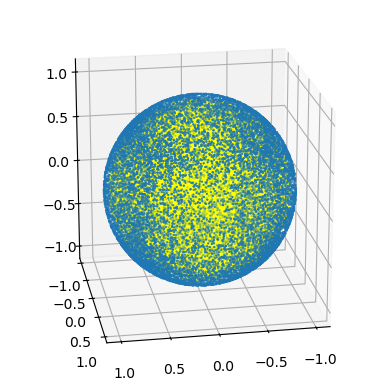

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 0.95*np.outer(np.cos(u), np.sin(v))
y = 0.95*np.outer(np.sin(u), np.sin(v))
z = 0.95*np.outer(np.ones(np.size(u)), np.cos(v))

x1 = np.random.uniform(low=-0.5, high=0.5, size=(20000, 1))
y1 = np.random.uniform(low=-0.5, high=0.5, size=(20000, 1))
z1 = np.random.uniform(low=-0.5, high=0.5, size=(20000, 1))

r = np.sqrt(x1**2 + y1**2 + z1**2)
x1 = x1/r
y1 = y1/r
z1 = z1/r

ax.plot_surface(x, y, z, facecolor='yellow')
ax.scatter(x1, y1, z1, s=0.3)

ax.view_init(20, 80)
ax.set_aspect('equal')
plt.show()

In [15]:
def randomComplex(samples=10):
    c_number = np.empty(shape=(samples,1), dtype='complex')
    real_imag = np.random.uniform(low=-1, high=1, size=(samples,2))
    #norms = np.linalg.norm(real_imag, axis=1).reshape(-1,1)
    #real_imag = real_imag/norms

    c_number.real = real_imag[:,0:1]
    c_number.imag = real_imag[:,1:2]

    return c_number

In [16]:
def qubitStates(num_qubits=1, num_states=10):
    states = np.empty(shape=(num_states, 2**num_qubits), dtype='complex')
    for i in range(2**num_qubits):
        states[:,i:i+1] = randomComplex(samples=num_states)

    moduli = np.sqrt(np.einsum('ij,ij->i', np.conj(states), states)).reshape(-1,1)
    states = states/moduli
    
    return states

In [99]:
qubit = qubitStates(num_qubits=1, num_states=3)

In [95]:
print(qubit.shape)

(10, 2)


In [19]:
eigval, eigvec = np.linalg.eig(qubit)

In [20]:
v1 = eigvec[:,0].reshape(-1,1)
v2 = eigvec[:,1].reshape(-1,1)

In [21]:
v2 = v2 - v1*np.vdot(v1.T, v2)
v2 = v2/np.linalg.norm(v2)

In [22]:
print(np.dot(np.conj(eigvec).T, eigvec))

[[ 1.        +0.j          0.20360886-0.23527929j -0.45211765+0.02347924j
  -0.04052855+0.36287651j]
 [ 0.20360886+0.23527929j  1.        +0.j         -0.17542498+0.02856445j
   0.01113708+0.09009694j]
 [-0.45211765-0.02347924j -0.17542498-0.02856445j  1.        +0.j
   0.01360846-0.41506519j]
 [-0.04052855-0.36287651j  0.01113708-0.09009694j  0.01360846+0.41506519j
   1.        +0.j        ]]


In [23]:
np.einsum('ij,ij->j', np.conj(eigvec), eigvec)

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

In [129]:
def orthogonalize(arr):
    vecs = arr.copy().astype(np.complex128)
    num_vec, dim = vecs.shape
    for i in range(num_vec):
        pre_norm = np.linalg.norm(vecs[i:i+1, :])
        for j in range(0, i):
            vecs[i:i+1,:] -= vecs[j:j+1,:]*np.vdot(vecs[j:j+1,:], vecs[i:i+1,:])
        post_norm = np.linalg.norm(vecs[i:i+1, :])
        if post_norm/pre_norm >= 1:
            vecs[i:i+1, :] /= post_norm

    return vecs

In [130]:
orthon_vecs = orthogonalize(qubit)

In [131]:
print(np.dot(np.conj(orthon_vecs), orthon_vecs.T))

[[1.00000000e+00+3.39220372e-18j 0.00000000e+00-5.55111512e-17j
  8.08730530e-17-3.43008409e-17j]
 [0.00000000e+00+5.55111512e-17j 1.00000000e+00+1.07108667e-17j
  7.07856019e-17+8.29386660e-18j]
 [8.08730530e-17+3.43008409e-17j 7.07856019e-17-8.29386660e-18j
  1.27963880e-32+0.00000000e+00j]]


In [114]:
v1 = qubit[0:1, :]
v2 = qubit[1:2, :]
v3 = qubit[2:3, :]

In [111]:
v1 /= np.linalg.norm(v1)
v2 -= v1*np.vdot(v1, v2)
v2 /= np.linalg.norm(v2)

In [108]:
v3 -= v1*np.vdot(v1, v3) + v2*np.vdot(v2, v3)
v3 /= np.linalg.norm(v3)

In [109]:
np.vdot(v1,v3)

(-0.5015615107739857+0.39991200660251713j)

In [117]:
pr = v1*np.vdot(v1, v3) + v2*np.vdot(v2, v3)
pr

array([[ 1.0000000e+00-2.67645323e-17j, -6.9388939e-18-1.11022302e-16j]])

In [119]:
v3 = v3 - pr
v3

array([[0.0000000e+00+2.67645323e-17j, 6.9388939e-18+1.11022302e-16j]])

In [122]:
norm = np.linalg.norm(v3)
norm

1.1441346111622052e-16

In [123]:
v3/norm

array([[0.        +0.23392818j, 0.06064753+0.97036049j]])